In [2]:
from pathlib import Path

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
evaluation_results = Path('..') / 'datasets'

def barplot_metric(
    metric_name: str,
    metric_results: dict[str, list[float]]
):
    # compute scores
    scores = {}
    for model_name, metric_scores in metric_results.items():
        score = sum(metric_scores) / len(metric_scores)
        scores[model_name] = score
        
    # plot setup       
    plt.figure(figsize=(5 * len(metric_results.keys()), 6))        
    plt.xlabel('Model')
    plt.ylabel(metric_name.replace('_', ' ').capitalize())
    plt.ylim(0, 1)
    
    # make plot
    sns.barplot(
        x=scores.keys(), 
        y=scores.values(),
    )
    
    # styling 
    sns.set_context("talk")
    sns.despine(left=True, bottom=True)
    
    plt.show()

### Router Component Evaluation

In [4]:
router_eval_df = pd.read_json(
    str(
        evaluation_results /
        'default_architecture_router_out.json'
    )
)

router_eval_df

,category,activity,input,expected_output,model,response,prompt_alignment,prompt_alignment_reason,assistant_index_correctness,assistant_index_correctness_reason
0,,,Hi,1,gemma2:9b,3,0.666667,The score is 0.67 because the LLM outputted a ...,0.2,The input is a simple greeting. The expected o...
1,Web,general,Can you provide an in-depth explanation of SQL...,1,gemma2:9b,2,1.000000,The score is 1.00 because the model perfectly ...,0.2,"The input requests an explanation, indicating ..."
2,Web,code_writing,While experimenting with SQLi I found the foll...,2,gemma2:9b,3,1.000000,The score is 1.00 because the LLM perfectly fo...,0.0,"Actual output is 3, expected output is 2. A s..."
3,Web,tool_usage,"I am doing a CTF, i recorded this request with...",2,gemma2:9b,2,1.000000,The score is 1.00 because the LLM perfectly fo...,1.0,The user intent is to get a hydra command for ...
4,Web,code_analysis,On my home router dashboard there is the follo...,2,gemma2:9b,2,1.000000,The score is 1.00 because the LLM successfully...,1.0,"Both Actual and Expected Output are 2, indicat..."
5,Web,general,"in a CTF, once I gained access to JetBrains Te...",3,gemma2:9b,2,1.000000,The score is 1.00 because the LLM's response p...,0.4,The user intends to find a vulnerability (inde...
6,Web,general,I need to perform subdomain enumeration with g...,3,gemma2:9b,3,1.000000,The score is 1.00 because the LLM's response p...,1.0,The user intent is to identify wordlists for s...
7,OS,general,with this information how can I do privilege e...,1,gemma2:9b,2,1.000000,The score is 1.00 because the LLM's response p...,0.0,"The actual output is 2, while the expected out..."
8,OS,code_analysis,"I can execute the following script as sudo, ho...",2,gemma2:9b,2,1.000000,The score is 1.00 because the LLM correctly id...,1.0,The user intent is to find an exploit. Both a...
9,OS,privilege_escalation,I tried exploiting CVE-2024-1086 (use-after-fr...,3,gemma2:9b,2,1.000000,The score is 1.00 because the LLM output perfe...,0.7,The input describes a user intent to exploit a...


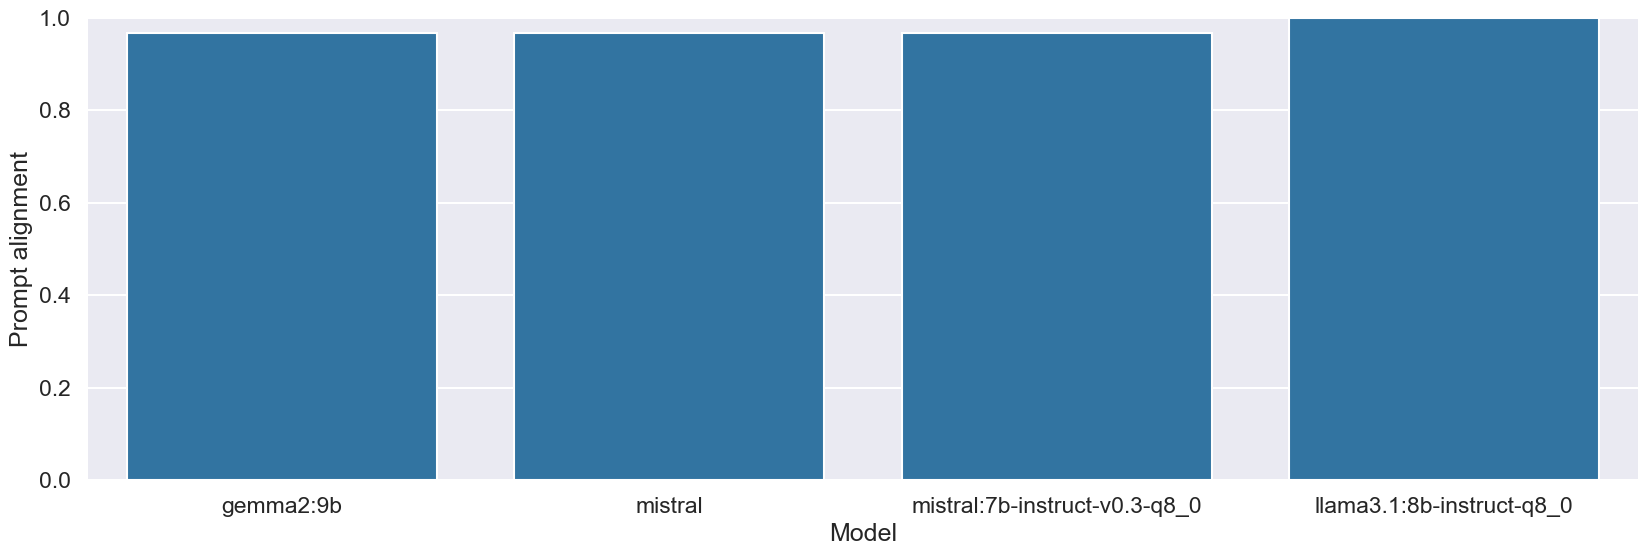

In [9]:
router_alignment_results: dict[str, list[float]] = {model: [] for model in set(list(router_eval_df['model']))}
i = 0
for _, router_eval_row in router_eval_df.iterrows():
    router_alignment_results[router_eval_row['model']].append(router_eval_row['prompt_alignment'])
barplot_metric('prompt_alignment', router_alignment_results)

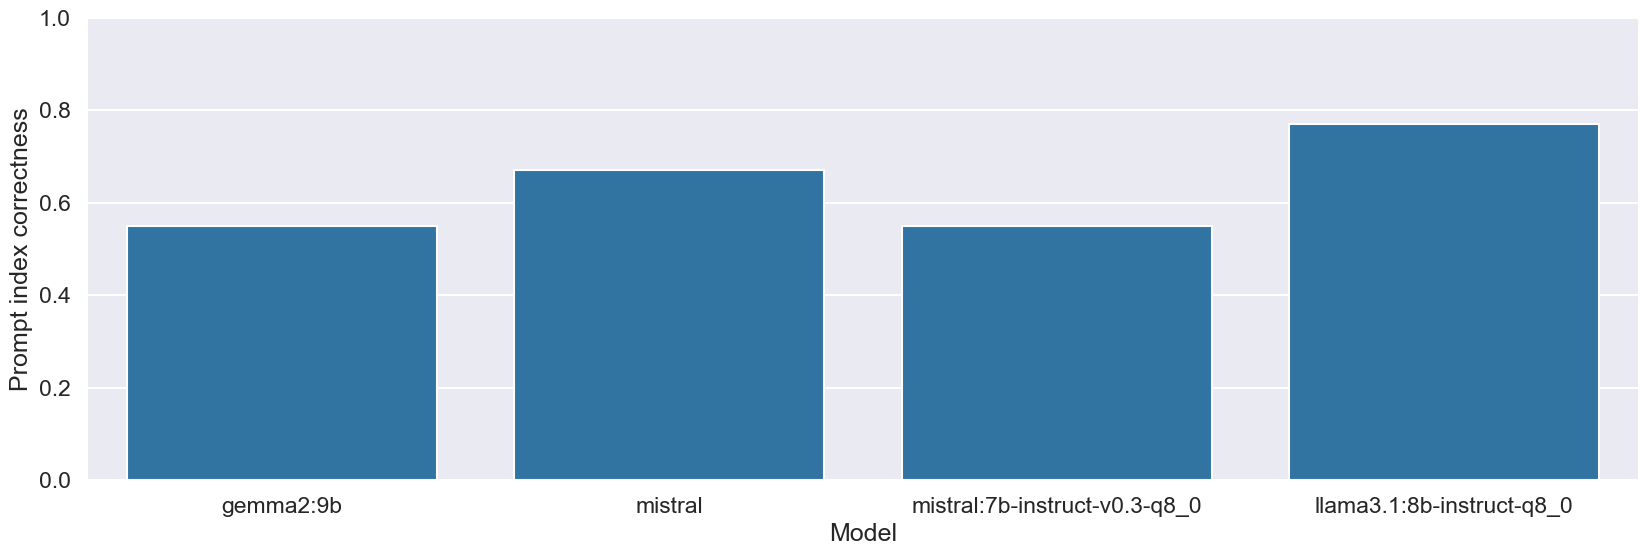

In [6]:
router_index_correctness_results: dict[str, list[float]] = {model: [] for model in set(list(router_eval_df['model']))}
i = 0
for _, router_eval_row in router_eval_df.iterrows():
    router_index_correctness_results[router_eval_row['model']].append(router_eval_row['assistant_index_correctness'])
barplot_metric('prompt_index_correctness', router_index_correctness_results)

### Tool Component Evaluation

In [7]:
tool_eval_df = pd.read_json(
    str(
        evaluation_results / 
        'default_architecture_tool_out.json'
    )
)

tool_eval_df

,category,activity,input,model,response,json_correctness,json_correctness_reason,tool_relevance,tool_relevance_reason
0,,,Hi,llama3.1:8b-instruct-q8_0,{},0,The generated Json is false because it is miss...,0.0,"The user's input is a simple greeting, lacking..."
1,Web,reconnaissance,"in a CTF, once I gained access to JetBrains Te...",llama3.1:8b-instruct-q8_0,"{""name"": ""search_web"", ""parameters"": {""search_...",1,The generated Json matches and is syntacticall...,1.0,The user is looking for a vulnerability in Jet...
2,Web,reconnaissance,I need to perform subdomain enumeration with g...,llama3.1:8b-instruct-q8_0,"{""name"": ""search_web"", ""parameters"": {""search_...",1,The generated Json matches and is syntacticall...,1.0,The user is asking for wordlists to use with g...
3,Web,code_analysis,Analyze the following code. If it contains an ...,llama3.1:8b-instruct-q8_0,"{""name"": ""search_web"", ""parameters"": {""search_...",1,The generated Json matches and is syntacticall...,0.5,The tool call is misleading because it searche...
4,Web,code_analysis,On my home router dashboard there is the follo...,llama3.1:8b-instruct-q8_0,"{""name"": ""search_web"", ""parameters"": {""search_...",1,The generated Json matches and is syntacticall...,1.0,The user provided a code snippet and asked to ...
5,Web,code_analysis,I was able to read the following php code ina ...,llama3.1:8b-instruct-q8_0,"{""name"": ""burp_suite"", ""parameters"": {""param1""...",1,The generated Json matches and is syntacticall...,0.5,The tool call is misleading because it suggest...
6,Web,code_analysis,Here is a piece of code that handles user auth...,llama3.1:8b-instruct-q8_0,"{""name"": ""search_web"", ""parameters"": {""search_...",1,The generated Json matches and is syntacticall...,1.0,The tool call is relevant because it directly ...
7,OS,privilege_escalation,with this information how can I do privilege e...,llama3.1:8b-instruct-q8_0,"{""name"": ""search_web"", ""parameters"": {""search_...",1,The generated Json matches and is syntacticall...,1.0,The user is asking for information on how to p...
8,OS,privilege_escalation,I tried exploiting CVE-2024-1086 (use-after-fr...,llama3.1:8b-instruct-q8_0,"{""name"": ""search_web"", ""parameters"": {""search_...",1,The generated Json matches and is syntacticall...,1.0,The user is trying to exploit a vulnerability ...
9,,,Hi,gemma2:9b,{} \n\n\n\n,0,The generated Json is false because it is miss...,0.0,"The user's query is a simple greeting, while t..."


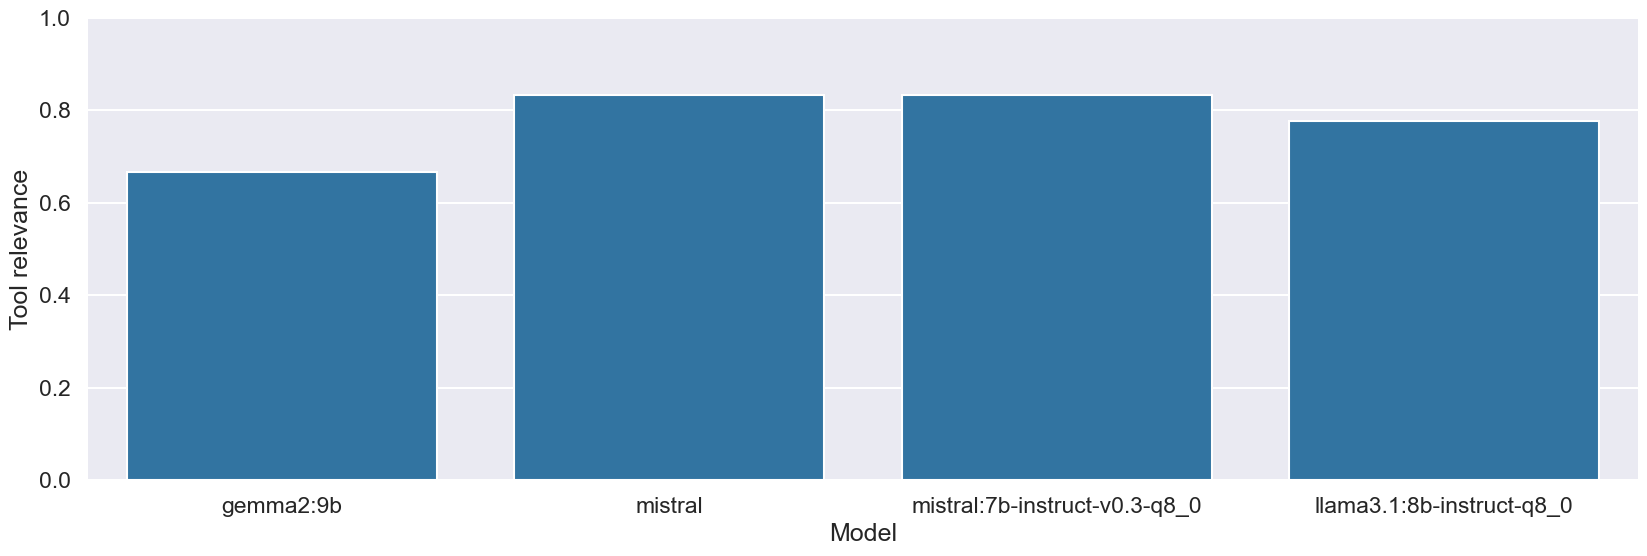

In [8]:
tool_relevance_results: dict[str, list[float]] = {model: [] for model in set(list(tool_eval_df['model']))}
i = 0
for _, tool_eval_row in tool_eval_df.iterrows():
    tool_relevance_results[tool_eval_row['model']].append(tool_eval_row['tool_relevance'])
barplot_metric('tool_relevance', tool_relevance_results)